<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Model Read

In [1]:
#===============================================
# Basic Imports
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py
import seaborn as sns
sns.set(style="whitegrid")
from tqdm import tqdm
import glob

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load tensorflow models
Load detection_pipe


In [2]:
list_of_models = glob.glob(BASE_FOLDER + '/modeling/pseudo_supervised/pipes_0002/*.pkl', recursive=True)
columns = ['model_path', 'roc_auc'
    , 'SNR', 'machine', 'ID', 'feature_type', 'feature_params'
    , 'model_type', 'model_params']
df = pd.DataFrame(columns=columns)

for i, model_path in enumerate(tqdm(list_of_models)):
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)
        #print(type(model))
        if 'uni_name' in dir(model):
            name = model.uni_name
        else:
            name = model.model.name

        data=[[
            model_path,
            model.roc_auc,
            model.task['SNR'],
            model.task['machine'],
            model.task['ID'],
            model.task['feat_col'],
            model.task['feat'],
            name,
            model.model_args]]
        df = df.append(pd.DataFrame(data=data, columns=columns))


100%|████████████████████████████████████████████████████████████████████████████████| 246/246 [00:07<00:00, 31.15it/s]


In [ ]:
df['spectrum'] = df

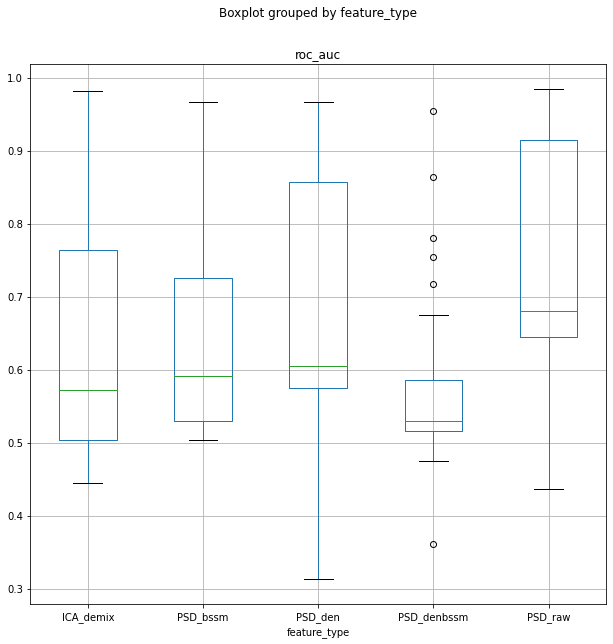

In [4]:
df[df.SNR=='min6dB'].boxplot(column='roc_auc', by='feature_type', figsize=(10,10))

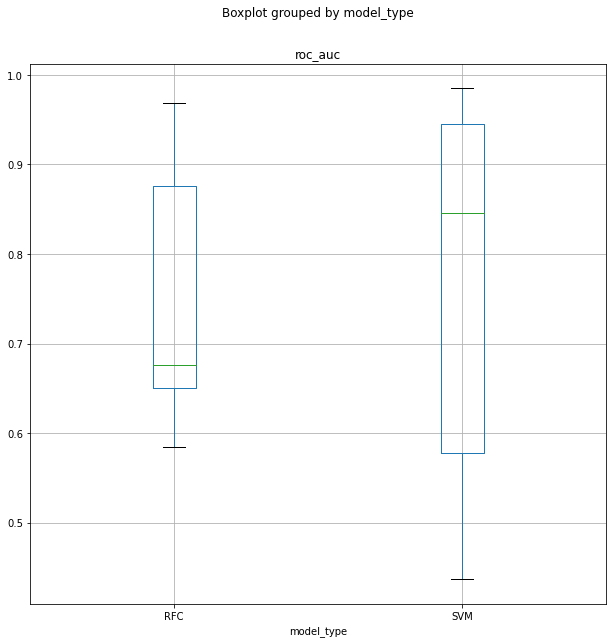

In [5]:
df[(df.SNR=='min6dB') & (df.feature_type=='PSD_raw')].boxplot(column='roc_auc', by='model_type', figsize=(10,10))

ValueError: not enough values to unpack (expected 2, got 0)

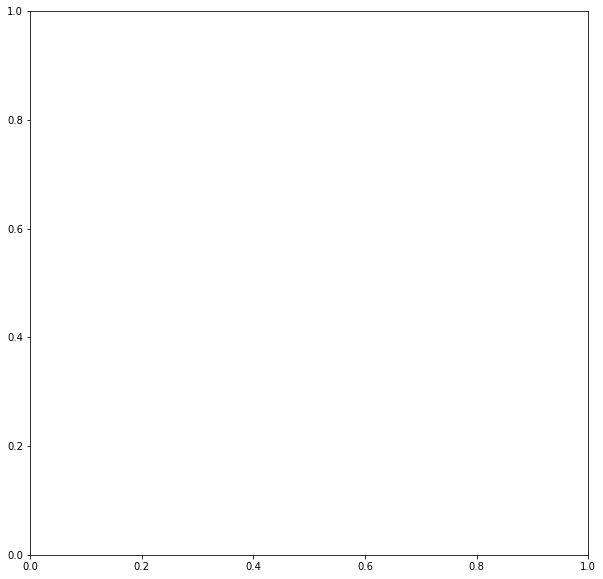

In [6]:
df[(df.SNR=='min6dB') & (df.model_type=='PSD_raw') ].boxplot(column='roc_auc', by='machine', figsize=(10,10))

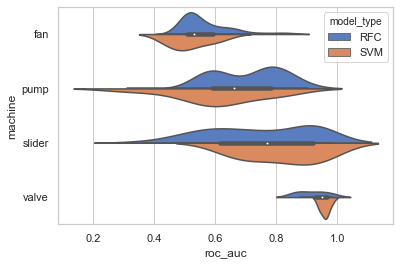

In [19]:

sns.violinplot(x='roc_auc', y="machine", hue="model_type", data=df[(df.SNR=='min6dB')], 
               palette="muted", split=True)

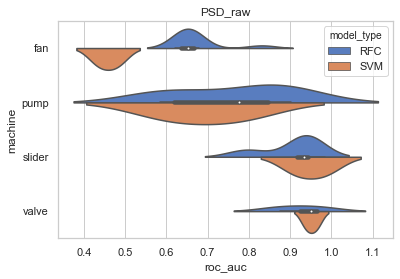

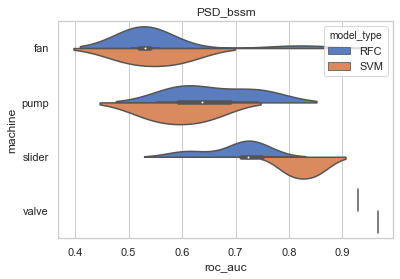

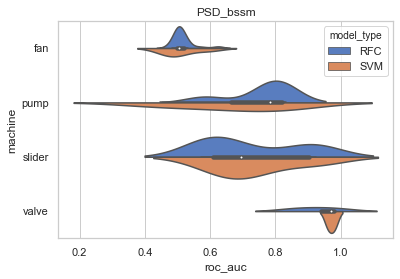

In [26]:
sns.violinplot(x='roc_auc', y="machine", hue="model_type", data=df[(df.SNR=='min6dB') & (df.feature_type=='PSD_raw')], 
               palette="muted", split=True)
plt.title('PSD_raw')
plt.show()
sns.violinplot(x='roc_auc', y="machine", hue="model_type", data=df[(df.SNR=='min6dB') & (df.feature_type=='PSD_bssm')], 
               palette="muted", split=True)
plt.title('PSD_bssm')
plt.show()

sns.violinplot(x='roc_auc', y="machine", hue="model_type", data=df[(df.SNR=='min6dB') & (df.feature_type=='ICA_demix')], 
               palette="muted", split=True)
plt.title('ICA_demix')
plt.show()


sns.violinplot(x='roc_auc', y="machine", hue="model_type", data=df[(df.SNR=='min6dB') & (df.feature_type=='ICA_demix')], 
               palette="muted", split=True)
plt.title('ICA_demix')
plt.show()



In [7]:
def plot_it(m):  
    sns.violinplot(x='roc_auc', y="feature_type", hue="model_type", data=df[(df.SNR=='min6dB') & (df.machine==m)], 
               palette="muted", split=True)
    plt.title(m)
    plt.show()
plot_it('pump')  
plot_it('slider')  
plot_it('fan')  
plot_it('valve')  

NameError: name 'sns' is not defined

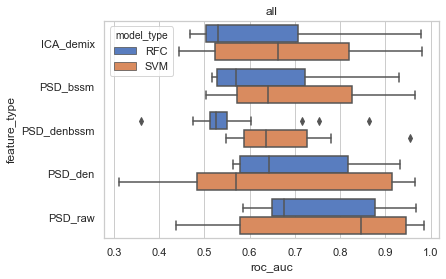

In [34]:
def plot_it():  
    sns.boxplot(x='roc_auc', y="feature_type", hue="model_type", data=df[(df.SNR=='min6dB')], 
               palette="muted")
    plt.title('all')
    plt.show()
plot_it()

## Conclusion

from the plots the best general pupose model apporches seem PSD_raw into RFC while sporadic machines like the valve would be best done with PSD_raw into a SVM

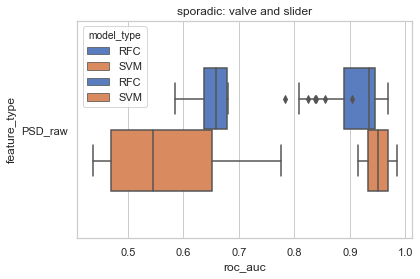

In [8]:
def plot_it(l,n):  
    f = ['PSD_raw']    
    sns.boxplot(x='roc_auc', y="feature_type", hue="model_type", data=df[(df.SNR=='min6dB') & (df.machine.isin(l))&(df.feature_type.isin(f))], 
               palette="muted")
    plt.title(n)
    #plt.show()
plot_it(['pump', 'fan'],'general: pump and fan')  
#plot_it(['slider'],'semi')  
plot_it(['valve', 'slider'],'sporadic: valve and slider')  

In [3]:
def activtype(m):
    #print(m)
    if m.machine in ['pump', 'fan']:
        m.activ_type = 'continues'
        return m
    else:
        m.activ_type = 'sporadic'
        return m


    
df['activ_type'] = ''
df_2 = df.apply(lambda x: activtype(x), axis=1)
    
df_2[['activ_type','machine']]

,activ_type,machine
0,continues,pump
0,continues,pump
0,continues,fan
0,continues,fan
0,continues,fan
...,...,...
0,sporadic,slider
0,sporadic,valve
0,sporadic,valve
0,sporadic,valve


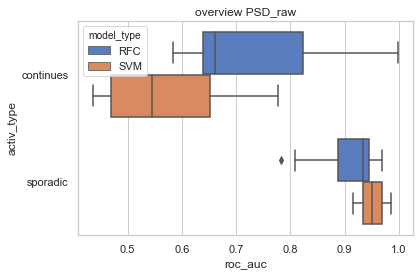

In [12]:

plt.figure()
def plot_it(df,n):  
    f = ['PSD_raw']    
    ax = sns.boxplot(x='roc_auc', y="activ_type", hue="model_type", data=df[(df.feature_type.isin(f))], 
               palette="muted")
    plt.title(n)
    return ax
    #plt.show()
ax = plot_it(df_2,'overview PSD_raw')  
fig = ax.get_figure()
fig.tight_layout()
fig.savefig(f'pseudo_sup_v1_box.png', transparent=True, dpi=300)